# Case 3. 
Dhruval Kikani and Gajalakshan Chandrasegaran<br>
Last edited: 13.03.20xx<br>
Neural Networks for Health Technology Applications<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en/)<br>

# Background

The aim of this Notebook is to use Convolutional Neural Networks or Recurrent Neural Networks in order to create a multiclass classifier for patient drug reviews from Drugs.com. The goal of the neural network model is to anticipate a drug's rating based on the content of the review. To make the process easier and to demonstrate sentiment analysis in this case study, the ratings are divided into three categories: Positive, Neutral, and Negative.


In [1]:
# Read the basic libraries (similar start as in Kaggle kernels)

import time # for timing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style = 'whitegrid')

# Neural network libraries
import tensorflow as tf



# Preprocessing utilities
from sklearn.model_selection import train_test_split # preprocessing datasets
from tensorflow.keras.preprocessing.text import Tokenizer # text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences # text preprocessing
from tensorflow.keras.utils import to_categorical # for one-hot-encoding

# For modeling
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential # modeling neural networks
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dense, Input, Activation, Embedding, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.initializers import Constant

# Final metrics
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

# Operating system
import os

# Check the tensorflow version
print('tensorflow version:', tf.__version__)

tensorflow version: 2.8.0


# Data

The data contained a collection of reviews of numerous prescription drugs from Drugs.com was utilized as the dataset. The downloadable data is already divided into training and testing sets, with training data accounting for 75% of the total data and testing data accounting for 25%. As a result, the training data was used to create a validation dataset.

In [2]:
# Create dataframes train and test
train = pd.read_csv('drugsComTrain_raw.csv')
test = pd.read_csv('drugsComTest_raw.csv')

# Show the first 5 rows of the train set
train.head(30)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


## Visualizing

**Concatenating the Training and Testing Datasets**

Note - Concatenating is done for only visualising purpose

**Top 20 drugs with 10/10 rating**

In [3]:
Condata = pd.concat([train, test])

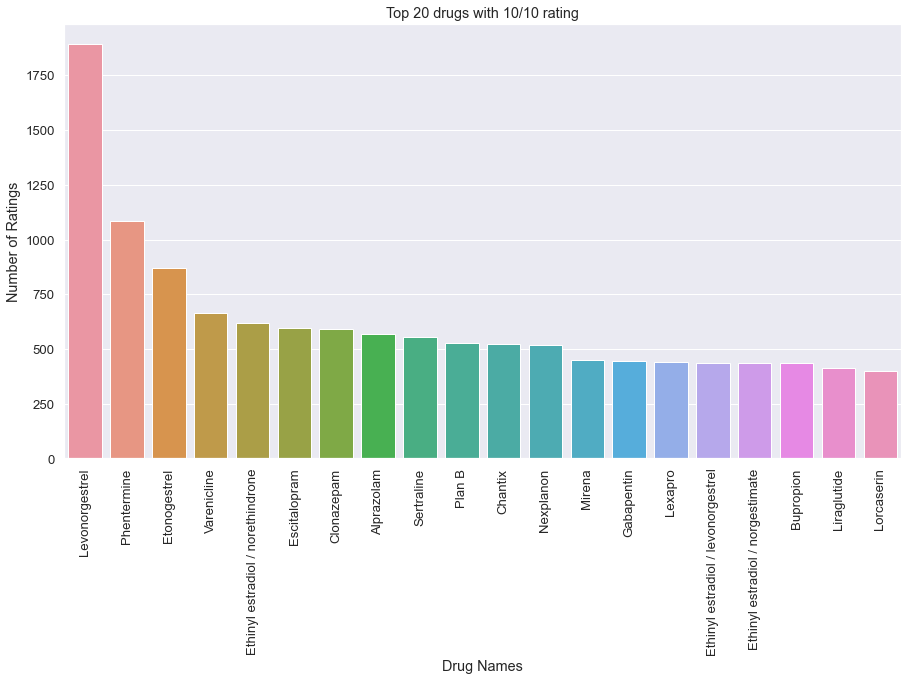

In [4]:
# This barplot shows the top 20 drugs with the 10/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(Condata.loc[Condata.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

**Top 20 drugs with 1/10 rating**

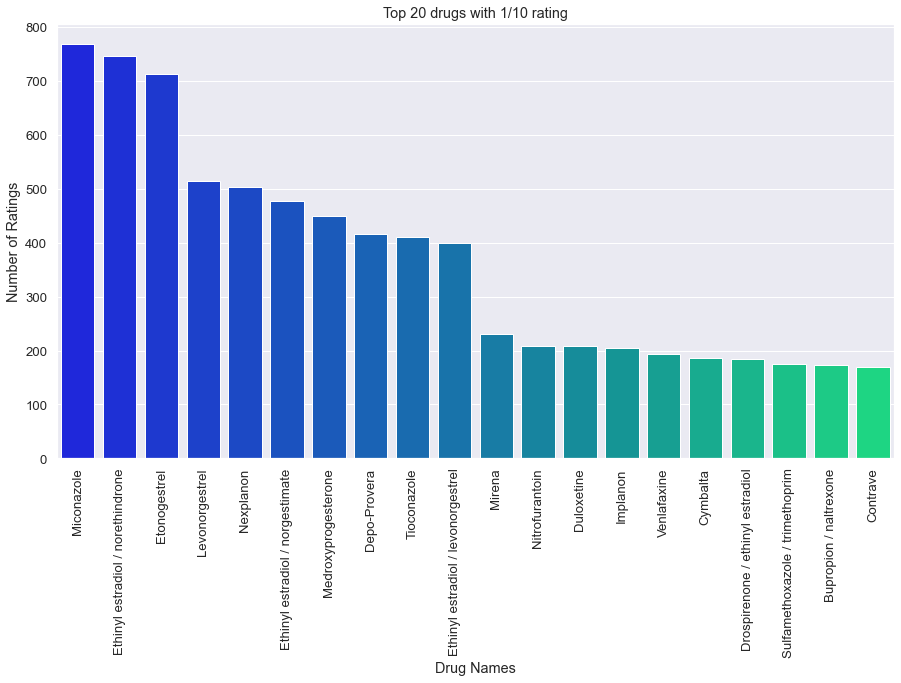

In [5]:
# This barplot shows the Top 20 drugs with the 1/10 rating

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(Condata.loc[Condata.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

# Preprocessing

The dataset required significant preprocessing,at first all the NaN values are dropped from the dataset since they dont contribute anything. Many conditions had an HTML tag left in called "/span" which were also removed from the data.Some apostrophes were interpreted incorrectly,their ASCII code was dispalyed rather than the actual "'", so they were replaced as well.All the conditions that had only have one drug were also erased since it can make ratings biased,all the data was converted into lower captial to make the model for training and testing purpose, lastly one hot codeing was also implemented on the dataset.

**Looking for NaN values**

In [6]:
Condata[Condata.isna().any(axis=1)]

,uniqueID,drugName,condition,review,rating,date,usefulCount
30,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10,18-Aug-10,1
148,61073,Urea,NaN,"""Accurate information.""",10,2-Jul-11,13
488,132651,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10,20-Oct-10,25
733,44297,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8,24-Jan-11,1
851,68697,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6,23-Mar-17,1
...,...,...,...,...,...,...,...
52424,170508,Quetiapine,NaN,"""good for insomnia most of the time""",7,27-May-15,10
52488,104629,Ethinyl estradiol / levonorgestrel,NaN,"""I am almost on my third month of my first pac...",5,25-Apr-11,4
52617,104642,Ethinyl estradiol / levonorgestrel,NaN,"""I have been taking this birth control for two...",10,11-Jan-11,1
52742,720,Medroxyprogesterone,NaN,"""I have been using the shot for 7 years now an...",10,21-Apr-11,1


**Droping NaN values**

In [7]:
train = train.dropna(axis = 0)
test = test.dropna(axis = 0)

**Dropping the "/span" HTML Tag**

In [8]:
train = train[train['condition'].astype(str).str.contains('</span>') == False]
test = test[test['condition'].astype(str).str.contains('</span>') == False]

**Changing the ASCII Code with an Apostrophe**

In [9]:
train['review'] = train['review'].str.replace("&#039;", "'", regex = False)
test['review'] = test['review'].str.replace("&#039;", "'", regex = False)

**Removing Special Characters**

In [10]:
train['review'] = train['review'].str.replace('&\w+;',' ', regex = False)
test['review'] = test['review'].str.replace('&\w+;',' ', regex = False)

**Dropping rows with Conditions that only have One Drug**

In [11]:
oneDrug = train.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False)
oneDrug_list = oneDrug[oneDrug == 1].index.to_list()
train = train[~train['condition'].isin(oneDrug_list)]

oneDrug_test = test.groupby(['condition'])['drugName'].nunique().sort_values(ascending = False)
oneDrug_list_test = oneDrug_test[oneDrug_test == 1].index.to_list()
test = test[~test['condition'].isin(oneDrug_list_test)]

**Converting to lowecase**

In [12]:
train['review'] = train['review'].map(lambda x: x.lower())
test['review'] = test['review'].map(lambda x: x.lower())

**Tokenizing the Review Text and Converting to Sequences**

max_features - how many unique words are used from the text data.

sequence_length - the maximum length of the review. All reviews are zero-padded to this length.

In [13]:
%%time

max_features = 5000
sequence_length = 200

# Tokenize the text
samples = train['review']
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(samples)

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(samples)

# Print out the number of unique tokens
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 53410 unique tokens.
Wall time: 11 s


**Categorize the ratings. 3 categories:**

- when ratings >= 6, then labels = 2.0
- when ratings >= 5 and ratings < 6, then labels = 1.0
- when ratings < 5, then labels = 0.0

In [14]:
ratings = train['rating'].values
labels = 1.0*(ratings >= 7) + 1.0*(ratings >= 5)
labels[:30]

array([2., 2., 1., 2., 2., 0., 0., 2., 0., 2., 2., 2., 0., 0., 0., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 1., 2.])

In [15]:
data = pad_sequences(sequences, maxlen = sequence_length)
print('Shape of data tensor:', data.shape)

Shape of data tensor: (158937, 200)


**One-hot-code the labels.**

In [16]:
hot_labels = to_categorical(labels)
print('Shape of label tensor:', hot_labels.shape)
hot_labels[:3]

Shape of label tensor: (158937, 3)


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

**Spilting into training and validation set**

In [17]:
VALIDATION_SPLIT = 0.25
N = int(VALIDATION_SPLIT * data.shape[0])

# Rearrange the data and the hot-encoded labels
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
hot_labels = hot_labels[indices]

# Split into train and validation datasets
train_data = data[:-N]
train_cat = hot_labels[:-N]
val_data = data[-N:]
val_cat = hot_labels[-N:]

# Model 

The following model was used, it had an embedding layer along with three Conv1D() followed by MaxPooling1D() layers.In addition to these layers we added Dropout() after each MaxPooling() layer to help reduce overfitting in the model,we tried different droupout numbers and ended with 0.5 as it seemed the best to us.
The activation fucntion was 'Relu' for hidden layers and 'Softmax' for thr output layer.The loss function used is catergorical_crossentropy since it is a multiclass classification problem,The optimizer used is 'Adam'since it showed better results then RMSprop and finally the metrics used was accuracy for this model.

In [18]:
model = Sequential([
    Embedding(max_features + 1, 256, input_length = 200),
   
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Dropout(0.5),
    
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    Dropout(0.5),
    
    Conv1D(128, 5, activation='relu'),
    GlobalAveragePooling1D(),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dense(3, activation = 'softmax')])

# Compile
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 256)          1280256   
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          163968    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 39, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 39, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 35, 128)           82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 7, 128)           0         
 1D)                                                    

# Training

The training was simple, only 10 epochs were required,although we tried 15 epochs but there wasnt significant difference so we decided to stick with 10.

In [19]:
%%time
history = model.fit(train_data, train_cat,
          batch_size = 128,
          epochs = 10,
          verbose = 1,
          validation_data=(val_data, val_cat))

Epoch 1/10
932/932 [==============================] - 185s 198ms/step - loss: 0.6398 - accuracy: 0.7542 - val_loss: 0.5494 - val_accuracy: 0.8004
Epoch 2/10
932/932 [==============================] - 184s 198ms/step - loss: 0.5148 - accuracy: 0.8127 - val_loss: 0.5198 - val_accuracy: 0.8175
Epoch 3/10
932/932 [==============================] - 186s 200ms/step - loss: 0.4600 - accuracy: 0.8323 - val_loss: 0.4960 - val_accuracy: 0.8244
Epoch 4/10
932/932 [==============================] - 186s 200ms/step - loss: 0.4151 - accuracy: 0.8463 - val_loss: 0.4910 - val_accuracy: 0.8308
Epoch 5/10
932/932 [==============================] - 185s 198ms/step - loss: 0.3776 - accuracy: 0.8576 - val_loss: 0.4804 - val_accuracy: 0.8323
Epoch 6/10
932/932 [==============================] - 184s 197ms/step - loss: 0.3455 - accuracy: 0.8681 - val_loss: 0.4693 - val_accuracy: 0.8338
Epoch 7/10
932/932 [==============================] - 183s 196ms/step - loss: 0.3205 - accuracy: 0.8773 - val_loss: 0.4795 -

# Results and Discussion

The following results were achieved, we got around 90 percent accuracy from the training set and around 80-85 percent from the validation set which was increasing,for loss we got around 0.2 percent and 0.4-0.5 loss with validation set, we tried various methods like tunning layers, filters, dropouts, or  changing optimizers/loss functions to reduce the validation loss but the result were sometimes a smooth curve and some times flattening out,in the end we went with increasing the droupout since it showed the best results.


In [20]:
# Plot the accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
e = np.arange(len(acc)) + 1



<Figure size 1080x576 with 0 Axes>

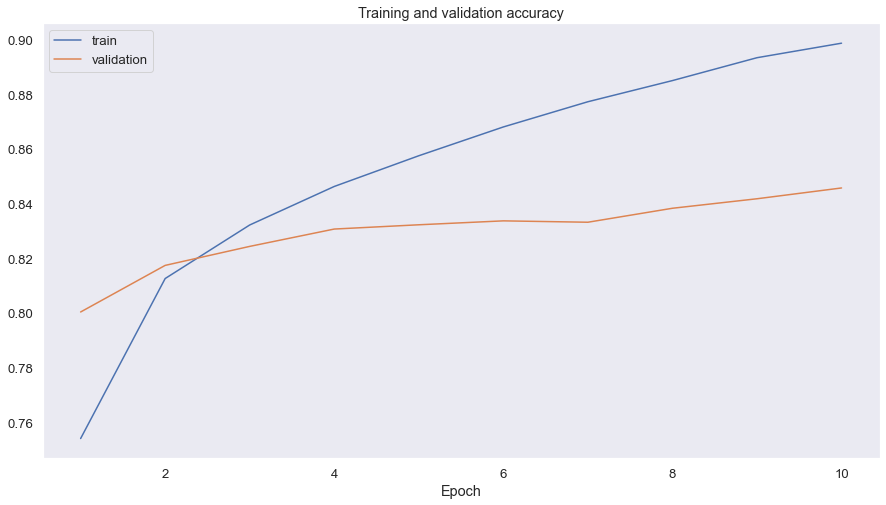

<Figure size 1080x576 with 0 Axes>

In [21]:
plt.plot(e, acc, label = 'train')
plt.plot(e, val_acc, label = 'validation')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend()

plt.figure()

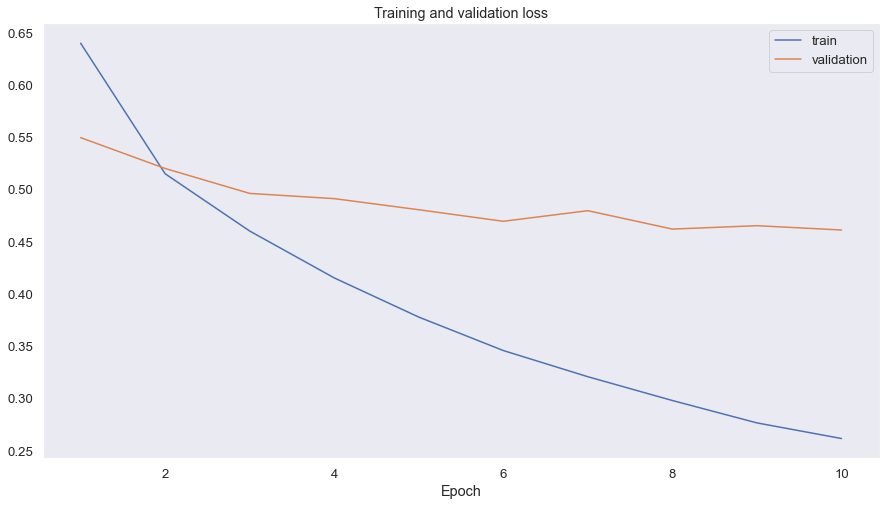

In [22]:
plt.plot(e, loss, label = 'train')
plt.plot(e, val_loss, label = 'validation')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()

plt.show()

In [23]:
# Find the predicted values for the validation set
pred_labels = np.argmax(model.predict(val_data), axis = 1)
val_labels = np.argmax(val_cat, axis = 1)

# Calculate the classiication report
cr = classification_report(val_labels, pred_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      9974
           1       0.45      0.30      0.36      3469
           2       0.90      0.94      0.92     26291

    accuracy                           0.85     39734
   macro avg       0.71      0.68      0.69     39734
weighted avg       0.83      0.85      0.84     39734



In [24]:
# Calculate the confusion matrix
cm = confusion_matrix(val_labels, pred_labels).T
print(cm)

[[ 7917  1052   980]
 [  606  1045   666]
 [ 1451  1372 24645]]


In [25]:
# Calculate the cohen's kappa, oth with linear and quadratic weights
k = cohen_kappa_score(val_labels, pred_labels)
print(f"Cohen's kappa (linear)    = {k:.4f}")
k2 = cohen_kappa_score(val_labels, pred_labels, weights = 'quadratic')
print(f"Cohen's kappa (quadratic) = {k2:.4f}")

Cohen's kappa (linear)    = 0.6751
Cohen's kappa (quadratic) = 0.7737


# Performance Evalution

We got 84 percent accuracy with this model in the testing set which is a good result, although it is less then the training set,but this is to be expected.The Cohen's kappa (linear) was 0.6758 and Cohen's kappa was 0.7785 which are fairly decent results.

In [26]:
test_samples = test['review'].values.tolist()
test_ratings = test['rating'].values

test_labels = 1.0*(test_ratings >= 7) + 1.0*(test_ratings >= 5)

test_sequences = tokenizer.texts_to_sequences(test_samples)
test_sequences = pad_sequences(test_sequences, maxlen = sequence_length)

test_cat = to_categorical(test_labels)

pred_labels_test = np.argmax(model.predict(test_sequences), axis = 1)
test_labels = np.argmax(test_cat, axis = 1)

In [27]:
results = model.evaluate(test_sequences, test_cat, verbose = 0)
print(results)

[0.45287036895751953, 0.8453592658042908]


In [28]:
cr_test = classification_report(test_labels, pred_labels_test)
print(cr_test)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     13306
           1       0.45      0.29      0.35      4733
           2       0.90      0.94      0.92     34819

    accuracy                           0.85     52858
   macro avg       0.71      0.68      0.69     52858
weighted avg       0.83      0.85      0.84     52858



In [29]:
cm_test = confusion_matrix(test_labels, pred_labels_test).T
print(cm_test)

[[10639  1386  1258]
 [  817  1386   902]
 [ 1850  1961 32659]]


In [30]:
k = cohen_kappa_score(test_labels, pred_labels_test)
print(f"Cohen's kappa (linear)    = {k:.4f}")
k2 = cohen_kappa_score(test_labels, pred_labels_test, weights = 'quadratic')
print(f"Cohen's kappa (quadratic) = {k2:.4f}")

Cohen's kappa (linear)    = 0.6758
Cohen's kappa (quadratic) = 0.7785


# Conclusions

Overall our model worked well with testing test,results inhe Grässer et al article, were better then ours,,we got around 84% accuracy,0.67 cohen Kappa linear and 0.77 quadratic which according to us are reasonable results.
There were complexities handling the validation loss,for now we dealt it with using dropout layers,but we have a lot to learn.

In this situation, the difference in optimizers was not considerable, but 'adam' performed better than 'rmsprop,' so we chose to use that optimizer.we kept the categorical_crossentropy as the loss fucntion , as this was a multiclass classification problem.

on the other hand activation fucntion was 'Relu' for hidden layers and 'Softmax' for the output layer.

In conclusion, this case study shows how complex it can be to work with langauage or text analysis, it also the highlights the importance of preprocessing and best practices that needs to be followed to reduce overfitting of text analysis model.